<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/BaoCaoGiuaKy/Face_Reconnization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.utils import to_categorical

In [ ]:
train_photos = np.load('/content/drive/MyDrive/AI/Backup_AI/AnhLop_photos.npy')
train_labels = np.load('/content/drive/MyDrive/AI/Backup_AI/AnhLop_labels.npy')
test_photos = np.load('/content/drive/MyDrive/AI/Backup_AI/AnhLop_photos_test.npy')
test_labels = np.load('/content/drive/MyDrive/AI/Backup_AI/AnhLop_labels_test.npy')

train_photos = train_photos.reshape(1700, 30, 30, 3)
train_photos = train_photos.astype('float32') / 255.0

test_photos = test_photos.reshape(336, 30, 30, 3)
test_photos = test_photos.astype('float32') / 255.0


Text(0.5, 1.0, 'So:3.0')

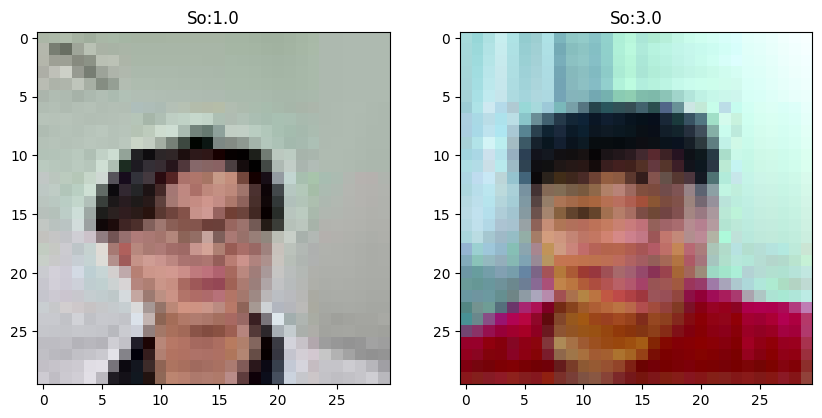

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = [10, 10])
plt.subplot(121)  # equivalent to: plt.subplot(1, 2, 1)
plt.imshow(train_photos[1], cmap = 'gray')
plt.title('So:{}'.format(train_labels[1]))

plt.subplot(122)
plt.imshow(train_photos[100], cmap = 'gray')
plt.title('So:{}'.format(train_labels[100]))

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras import losses
batch_size = 64
epochs = 40
classes = 35
loss = losses   

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (30, 30, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [ ]:
#bo ANN de phan loai
model.add(Flatten())    #chuyen anh thanh vecto, dua qua mang ANN
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #classes = 100

In [ ]:
from keras import optimizers
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [ ]:
train = model.fit(train_photos, train_labels, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/40
27/27 [==============================] - 13s 15ms/step - loss: 3.1299 - accuracy: 0.1724
Epoch 2/40
27/27 [==============================] - 0s 7ms/step - loss: 0.8724 - accuracy: 0.7806
Epoch 3/40
27/27 [==============================] - 0s 7ms/step - loss: 0.2505 - accuracy: 0.9306
Epoch 4/40
27/27 [==============================] - 0s 7ms/step - loss: 0.1112 - accuracy: 0.9694
Epoch 5/40
27/27 [==============================] - 0s 7ms/step - loss: 0.0667 - accuracy: 0.9835
Epoch 6/40
27/27 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 0.9882
Epoch 7/40
27/27 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9894
Epoch 8/40
27/27 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9947
Epoch 9/40
27/27 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9988
Epoch 10/40
27/27 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.9971
Epoch 11/40
27/27

In [ ]:
test_loss, test_acc = model.evaluate(test_photos, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

11/11 [==============================] - 0s 11ms/step - loss: 0.1920 - accuracy: 0.9732
Accurency: 0.9732142686843872
Loss: 0.19201065599918365


In [ ]:
model.save("/content/drive/MyDrive/AI/Backup_AI/FaceRec.h5")

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/AI/Backup_AI/FaceRec.h5')

Test loss: 0.16550375521183014
Test accunacy 0.9732142686843872


Text(0.5, 1.0, 'Training & Testing Accuracy')

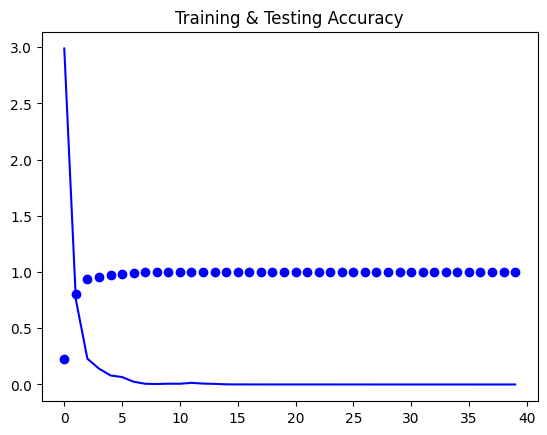

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_photos, test_labels, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

1/1 [==============================] - 0s 204ms/step
VuThach


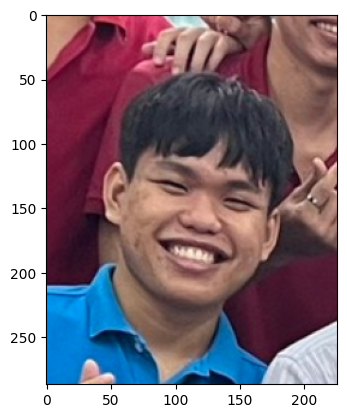

1/1 [==============================] - 0s 54ms/step
QuangPhuc


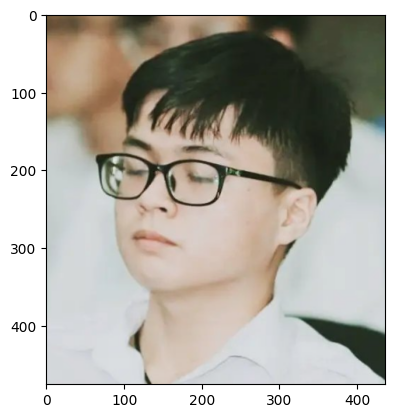

1/1 [==============================] - 0s 122ms/step
HQHuy


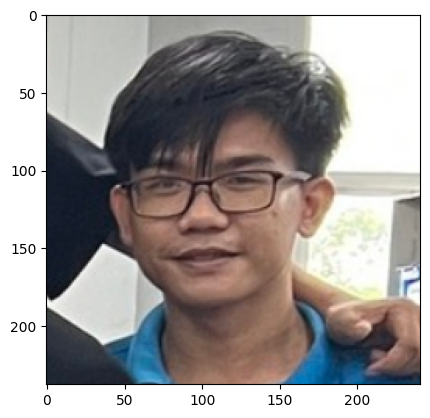

1/1 [==============================] - 0s 34ms/step
HQHuy


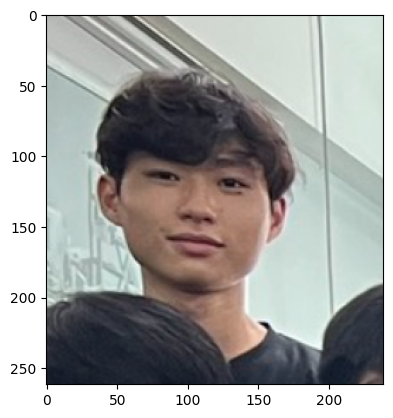

In [ ]:
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI/Anh_Lop/Testt'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (30, 30))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['AnhKiet', 'Binh', 'BuiKiet', 'ChiLoc', 'HQHuy', 'Hau',
              'Hieu', 'HoaiPhong', 'HuuLong', 'KhoaBui', 'KyAnh', 'Luan',
              'NgocThach', 'NGuyenHoang', 'NhatHuy', 'NhatSang', 'Phuc',
              'PhucDung', 'QuangPhuc', 'SonTung', 'TanDat', 'TanLoc',
              'TanPhat', 'TanThinh', 'Thai', 'Thang', 'Thanh', 'Thao',
              'Tien', 'Trong', 'TuanKiet', 'Van', 'VietHa', 'VuThach']
  print(class_name[result - 1])
  plt.show()